# MVP Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mvpmodel import MVPmodel

Definerer default parametre (fra slides you know)

In [3]:
tau1 = 49 # min
tau2 = 47 # min
C1 = 20.1 # dL/min
p2 = 0.0106 # 1/min
S1 = 0.0081 # dL/mU/min
gezi = 0.0022 # 1/min
egp0 = 1.33 # mg/dL/min
Vg = 253 # dL
taum = 47 # min
tausc = 5 # min

param = [tau1, tau2, C1, p2, S1, gezi, egp0, Vg, taum, tausc]


In [7]:
# Laver start statevector:
x0 = np.zeros(7)
# Men det er lowkey fucked hvis deres blodsukker er nul (de er døde så. Så det lader vi lige vær med )
x0[5] = 300
x0[6] = 300
# Laver et MVPmodel objekt. Kære patient ved navn ok.
ok = MVPmodel(x0, param)
# Problem 1 der beder en om at simulere patienten med predefineret insulin injection rate og carb digestion (som er 0)
n = 288 # Antal steps at køre (antal 5 min per dag)
u = np.ones(n - 1) * 25.04 # Insulin injection
d = np.zeros(n - 1) # Carb digestion
states = ok.iterate(u, d) # states er matrix der indeholder alle vector states.

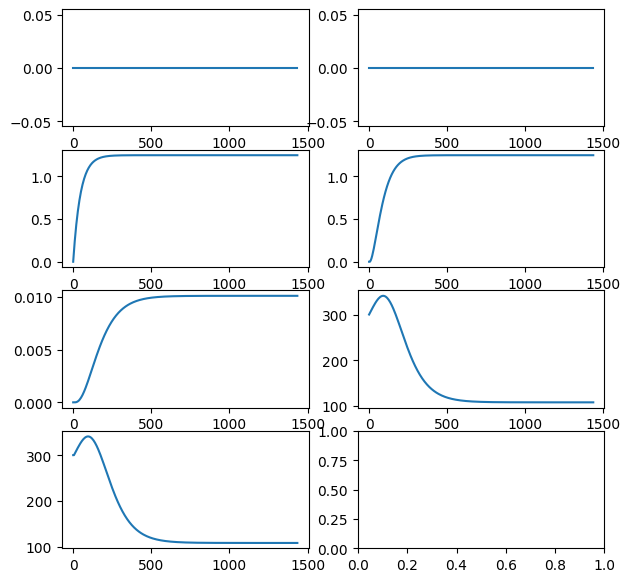

In [8]:
ts = np.arange(0, 24 * 60, 5) # Til x-aksen.

fig, ax = plt.subplots(4,2, figsize = (7,7))
for i in range(7):
    ax[i//2, i%2].plot(ts,states[:,i])
# Gider ikke aksetitler.
plt.show()

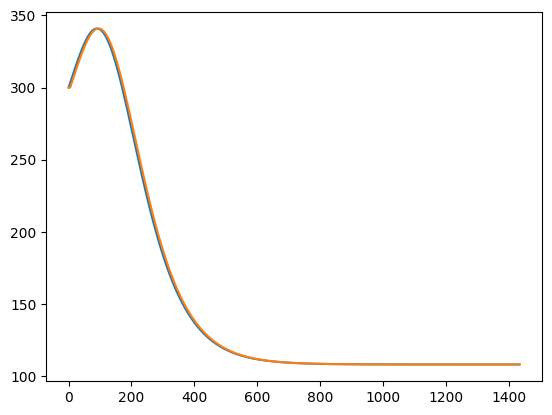

In [ ]:
# De to glucose der. Blodsukker og det andet.
plt.plot(ts, states[:,5])
plt.plot(ts, states[:,6])

Nu den udvidede model! Med controller.

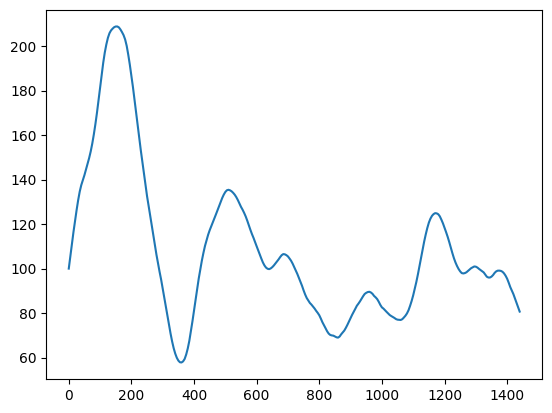

In [9]:
plt.cla()
x0 = np.zeros(7)
x0[5] = 100 # 300 var lidt wild.
x0[6] = 100 
ok = MVPmodel(x0, param)

n = 288
d = np.random.randn(n)


target = 108
us = 20
Kp = 0.25
Ti = 400
Td = 20

y = ok.simulate(d, target, us, Kp, Ti, Td)
x =  np.arange(0,1445, 5)
plt.plot(x,y)
plt.show()